In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

{-180.0: ([<matplotlib.lines.Line2D at 0x1c46ea90>],
   <matplotlib.text.Text at 0x1c494780>]),
 -120.0: ([<matplotlib.lines.Line2D at 0x1c4792e8>],
  [<matplotlib.text.Text at 0x1c494cc0>]),
 -60.0: ([<matplotlib.lines.Line2D at 0x1c479ac8>],
  [<matplotlib.text.Text at 0x1c4a8240>]),
 0.0: ([<matplotlib.lines.Line2D at 0x1c47f2e8>],
  [<matplotlib.text.Text at 0x1c4a8780>]),
 60.0: ([<matplotlib.lines.Line2D at 0x1c47fac8>],
  [<matplotlib.text.Text at 0x1c4a8cc0>]),
 120.0: ([<matplotlib.lines.Line2D at 0x1c48f2e8>],
  [<matplotlib.text.Text at 0x1c4ad240>]),
 180.0: ([<matplotlib.lines.Line2D at 0x1c48fac8>],
   <matplotlib.text.Text at 0x1c4adcc0>])}

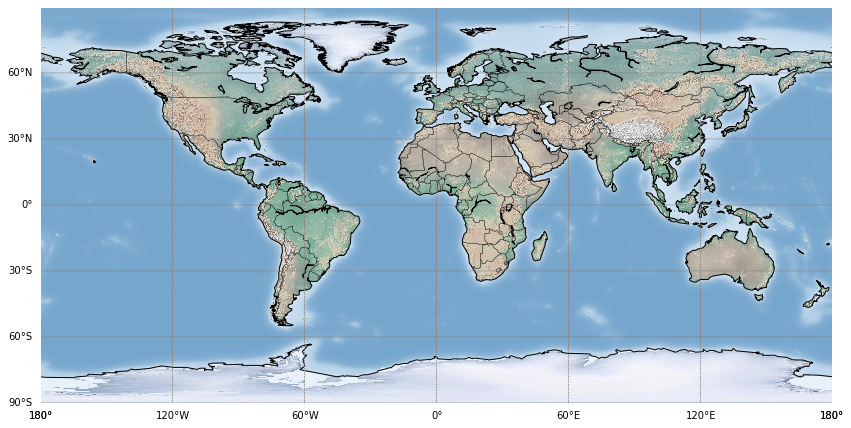

In [2]:
from mpl_toolkits.basemap import Basemap 
fig = plt.figure(figsize=(11,10)) 
ax = fig.add_axes([0,0,1,1]) 
map = Basemap(projection='cyl', resolution='c') 
map.shadedrelief() 
map.drawcoastlines() 
map.drawcountries() 
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],  
                  color='grey') 
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),  
                  labels=[0,0,0,1], color='grey') 

In [3]:
plt.style.available

['seaborn-bright',
 'classic',
 'seaborn-poster',
 'dark_background',
 'grayscale',
 'seaborn-ticks',
 'seaborn-deep',
 'seaborn-pastel',
 'seaborn-colorblind',
 'seaborn-paper',
 'ggplot',
 'seaborn-white',
 'seaborn-talk',
 'seaborn-muted',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-darkgrid',
 'bmh',
 'seaborn-notebook',
 'seaborn-dark-palette']

In [4]:

matplotlib.style.use('fivethirtyeight')

In [5]:
cols = ['user_id','item_id','rating','timestamp']

In [7]:
dfratings = pd.read_csv('Chapter 1/data/ratings.dat', sep='::',
                       index_col=False, names=cols, encoding='UTF-8')

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [9]:
dfratings[:5]

,user_id,item_id,rating,timestamp
0,1,1074638,7,1365029107
1,1,1853728,8,1366576639
2,2,104257,8,1364690142
3,2,1259521,8,1364118447
4,2,1991245,7,1364117717


In [10]:
ratings_counts = dfratings['rating'].value_counts()

In [11]:

ratings_counts

8     12012
7     11063
9      7119
6      6373
10     6281
5      3399
4      1696
3       924
1       595
2       533
0         5
Name: rating, dtype: int64

In [12]:

sorted_counts = ratings_counts.sort_index()
sorted_counts

0         5
1       595
2       533
3       924
4      1696
5      3399
6      6373
7     11063
8     12012
9      7119
10     6281
Name: rating, dtype: int64

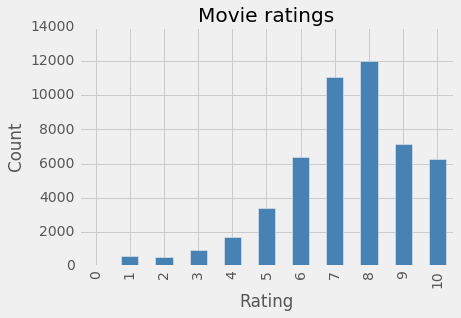

In [13]:
sorted_counts.plot(kind='bar', color='SteelBlue');
plt.title('Movie ratings');
plt.xlabel('Rating');
plt.ylabel('Count');

# http://matplotlib.org/examples/color/named_colors.html

In [14]:
cols = ['movie_id', 'movie_title','genre']
dfmovies = pd.read_csv('Chapter 1/data/movies.dat',
                      sep='::',index_col=False, names=cols, 
                      encoding="UTF-8")

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


In [15]:
dfmovies.head()

,movie_id,movie_title,genre
0,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
1,4936,The Bank (1915),Comedy|Short
2,7264,The Rink (1916),Comedy|Short
3,8133,The Immigrant (1917),Short|Comedy|Drama|Romance
4,9968,Broken Blossoms or The Yellow Man and the Girl...,Drama|Romance


In [16]:
dfmovies.genre.value_counts()


Drama                                                     696
Comedy                                                    391
Comedy|Drama                                              302
Comedy|Drama|Romance                                      227
Drama|Romance                                             226
Comedy|Romance                                            204
Documentary                                               199
Horror|Thriller                                           154
Horror                                                    151
Crime|Drama|Thriller                                      134
Drama|Thriller                                            113
Crime|Drama                                               102
Action|Crime|Thriller                                      89
Thriller                                                   87
Action|Crime|Drama|Thriller                                78
Horror|Mystery|Thriller                                    72
Crime|Dr

In [17]:
drama = dfmovies[dfmovies.genre == 'Crime|Drama']


In [18]:
drama_ids = drama['movie_id']

In [19]:
criterion = dfratings['item_id'].map(lambda x:(drama_ids == x).any())
drama_ratings = dfratings[criterion]

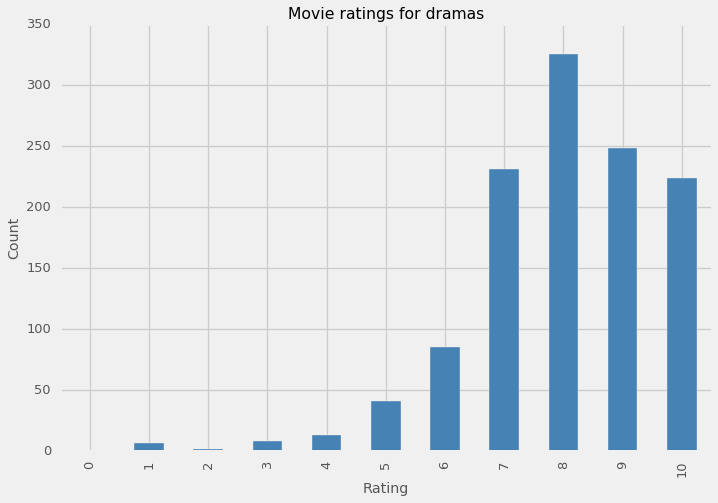

In [22]:
matplotlib.style.use('seaborn-talk')
rating_counts = drama_ratings['rating'].value_counts()
sorted_counts = rating_counts.sort_index()
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie ratings for dramas')
plt.xlabel('Rating')
plt.ylabel('Count')

In [23]:

gss_data = pd.read_stata('GSS2014merged_stata/GSS2014merged_R4a.dta',
                        convert_categoricals=False)

In [24]:
gss_data.head()


,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,prestg10,...,clsgayw,othgayw,clsnjobm,othnjobm,clsnjobw,othnjobw,clspolm,othpolm,clspolw,othpolw
0,2014,1,1.0,60.0,NaN,NaN,1.0,2.0,220.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,2,1.0,40.0,NaN,NaN,2.0,2.0,700.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,3,4.0,NaN,NaN,NaN,2.0,2.0,8740.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,4,2.0,20.0,NaN,NaN,2.0,2.0,50.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,5,5.0,NaN,NaN,1.0,2.0,1.0,800.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
gss_data.set_index('id')
gss_data.drop('id',1,inplace=True)

In [26]:
gss_data.to_csv('GSS2014merged.csv')


In [27]:
gss_data.shape


(3842, 968)

In [28]:
gss_data.columns

Index(['year', 'wrkstat', 'hrs1', 'hrs2', 'evwork', 'wrkslf', 'wrkgovt',
       'occ10', 'prestg10', 'prestg105plus',
       ...
       'clsgayw', 'othgayw', 'clsnjobm', 'othnjobm', 'clsnjobw', 'othnjobw',
       'clspolm', 'othpolm', 'clspolw', 'othpolw'],
      dtype='object', length=968)

In [29]:
'age' in gss_data.columns

True

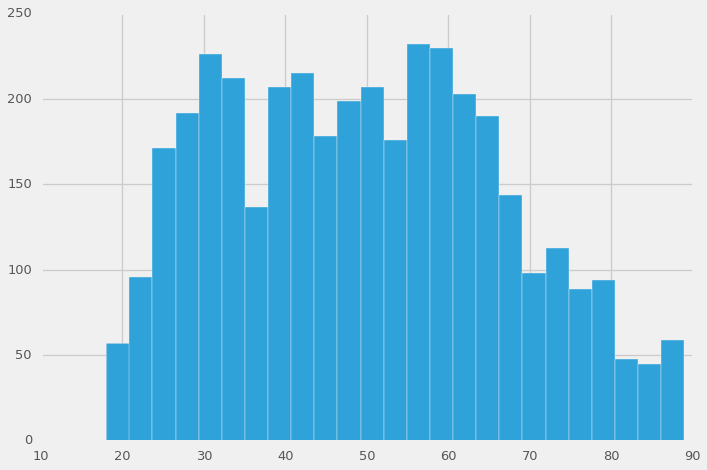

In [31]:
gss_data.age.hist(bins=25);


In [32]:
inc_age = gss_data[['realrinc','age']]
inc_age.head(10)

,realrinc,age
0,39022.50000,53.0
1,39022.50000,26.0
2,NaN,59.0
3,6503.75000,56.0
4,NaN,74.0
5,132148.07386,56.0
6,NaN,63.0
7,15372.50000,34.0
8,NaN,37.0
9,21285.00000,30.0


In [33]:
inc_age = gss_data[['realrinc','age']].dropna()
inc_age.head(10)

,realrinc,age
0,39022.50000,53.0
1,39022.50000,26.0
3,6503.75000,56.0
5,132148.07386,56.0
7,15372.50000,34.0
9,21285.00000,30.0
13,11233.75000,40.0
14,13007.50000,25.0
15,11233.75000,56.0
16,39022.50000,51.0


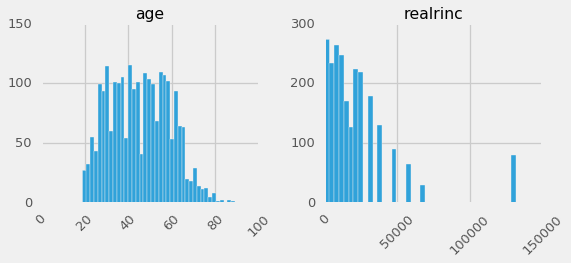

In [34]:
ax_list = inc_age.hist(bins=40, figsize=(8,3), xrot=45)
for ax in ax_list[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

In [35]:
inc_age[inc_age.realrinc > 100000].count()


realrinc    80
age         80
dtype: int64

In [36]:
inc_age[inc_age.realrinc > 100000].head()

,realrinc,age
5,132148.07386,56.0
17,132148.07386,46.0
66,132148.07386,65.0
67,132148.07386,57.0
77,132148.07386,58.0


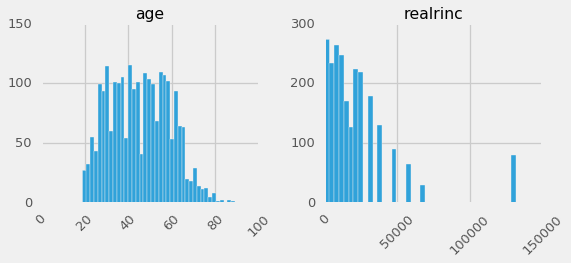

In [37]:
ax_list = inc_age.hist(bins=40, figsize=(8,3), xrot=45)
for ax in ax_list[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

In [38]:
inc_age[inc_age.realrinc > 100000].count()

realrinc    80
age         80
dtype: int64

In [39]:
inc_age[inc_age.realrinc > 100000].head(10)

,realrinc,age
5,132148.07386,56.0
17,132148.07386,46.0
66,132148.07386,65.0
67,132148.07386,57.0
77,132148.07386,58.0
127,132148.07386,38.0
136,132148.07386,61.0
217,132148.07386,46.0
231,132148.07386,69.0
241,132148.07386,51.0


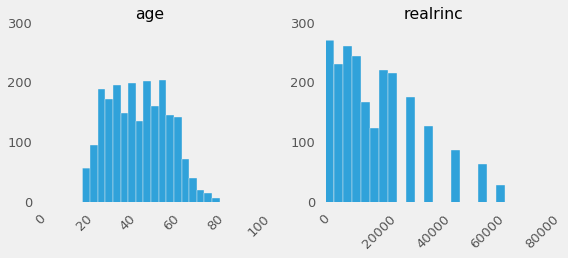

In [40]:
inc_age = gss_data[['realrinc','age']].dropna()
lowinc_age = inc_age[inc_age.realrinc < 1.0E5]
ax_list = lowinc_age.hist(bins=20, figsize=(8,3), xrot=45)
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

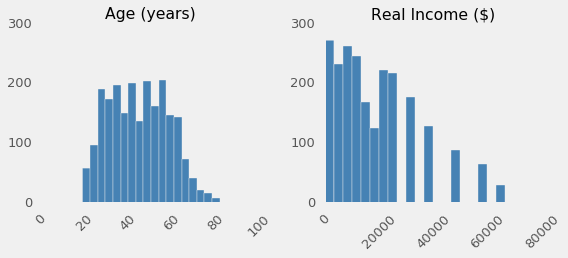

In [41]:
ax_list = lowinc_age.hist(bins=20, figsize=(8,3), xrot=45, color='SteelBlue')
ax1, ax2 = ax_list[0]
ax1.set_title('Age (years)')
ax2.set_title('Real Income ($)')
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=4)

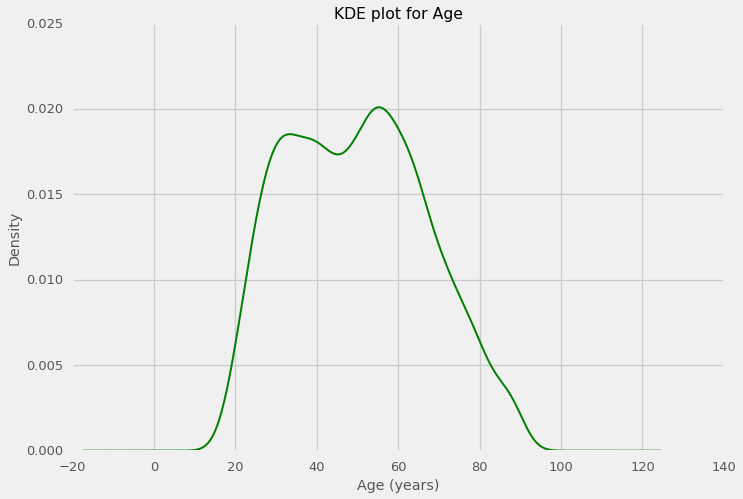

In [42]:
age = gss_data['age'].dropna()
age.plot(kind='kde', lw=2, color='green')
plt.title('KDE plot for Age')
plt.xlabel('Age (years)');

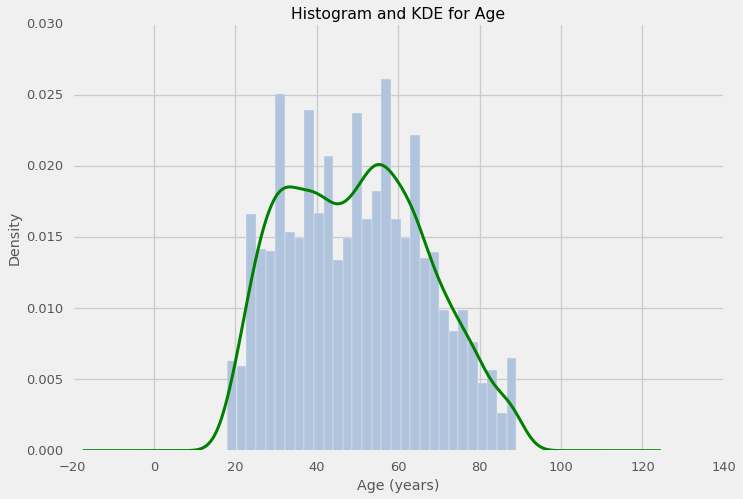

In [43]:
ax = age.hist(bins=30, color='LightSteelBlue', normed=True)
age.plot(kind='kde',lw=3,color='Green',ax=ax)
plt.title('Histogram and KDE for Age')
plt.xlabel('Age (years)');

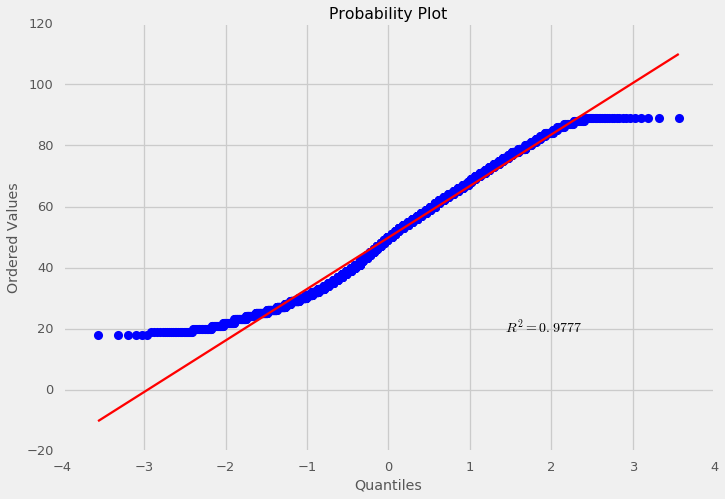

In [44]:
import scipy.stats as stats
stats.probplot(age, dist='norm', plot=plt);

In [45]:
inc = gss_data['realrinc'].dropna()
lowinc = inc[inc < 1.0E5]
lowinc.describe()

count     2252.000000
mean     19178.396203
std      14774.789813
min        236.500000
25%       7686.250000
50%      15372.500000
75%      26015.000000
max      66220.000000
Name: realrinc, dtype: float64

In [46]:
lowinc.describe(percentiles=np.arange(0,1.0,0.1))

count     2252.000000
mean     19178.396203
std      14774.789813
min        236.500000
0%         236.500000
10%       2601.500000
20%       6503.750000
30.0%    10051.250000
40%      13007.500000
50%      15372.500000
60.0%    21285.000000
70%      26015.000000
80%      31927.500000
90%      39022.500000
max      66220.000000
Name: realrinc, dtype: float64

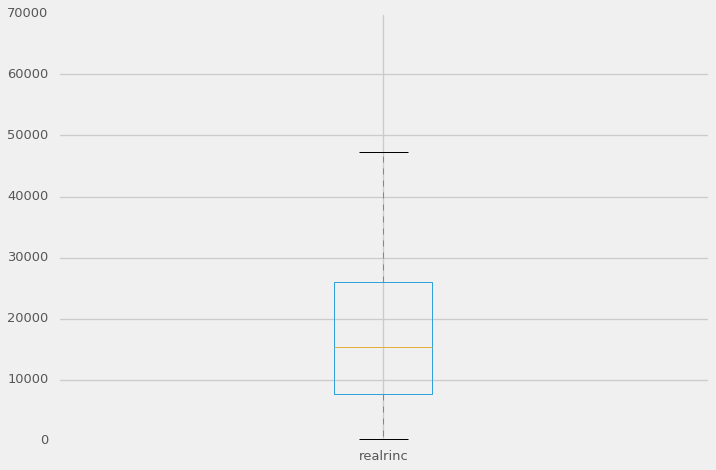

In [47]:
lowinc.plot(kind='box');

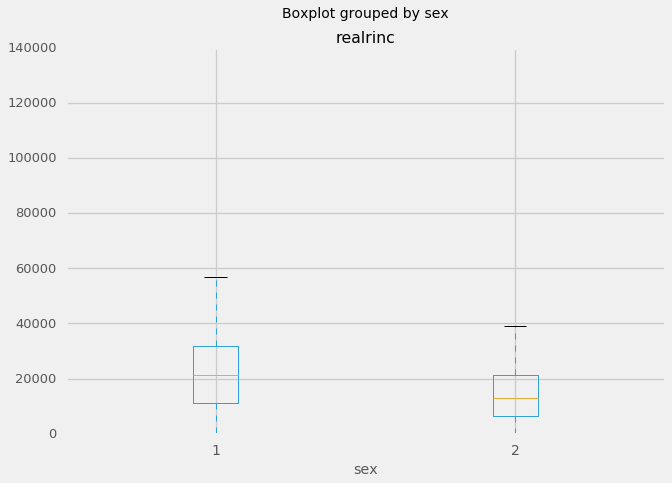

In [48]:
inc_gen = gss_data[['realrinc','sex']]
inc_gen.boxplot(column='realrinc',by='sex');

## Chapter 2

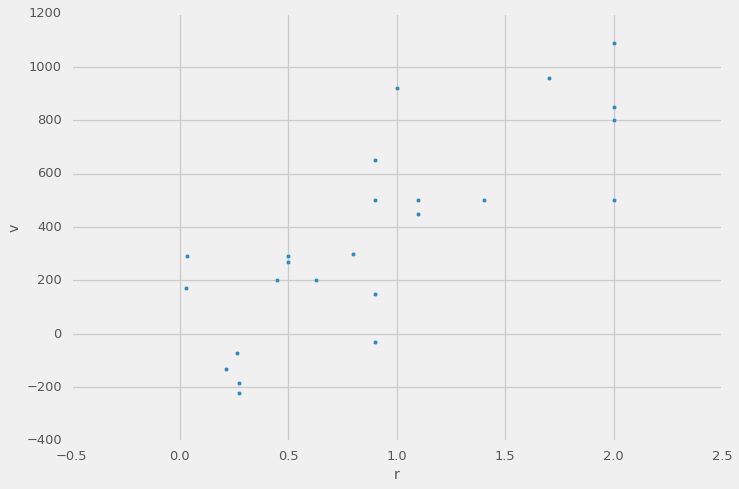

In [52]:
cols = ['id', 'r','v']
hubble_data = pd.read_csv('Chapter 2/data/hubble.csv',skiprows=2,
                         names=cols)
hubble_data.plot(kind='scatter', x='r', y='v');

In [54]:
hubble_data.head()

,id,r,v
0,SMC,0.032,170
1,5194,0.500,270
2,1055,1.100,450
3,LMC,0.034,290
4,4449,0.630,200
